我整理了一下就是：从2014年开始全市场股票按过去三个月(最高价/最低价)的标准差的分层回测
按这个指标大小将全部股票分五层，计算每层的收益

然后计算多头的收益（买第五层），最大回撤，还有相对基准（中证全指）的超额收益，波动率，夏普比率

姚唐适:
多头的收益，最大回撤，还有相对基准（中证全指）的超额收益，波动率，夏普比率～

姚唐适:
因子就反转因子就是过去20天收益率相反数就好了


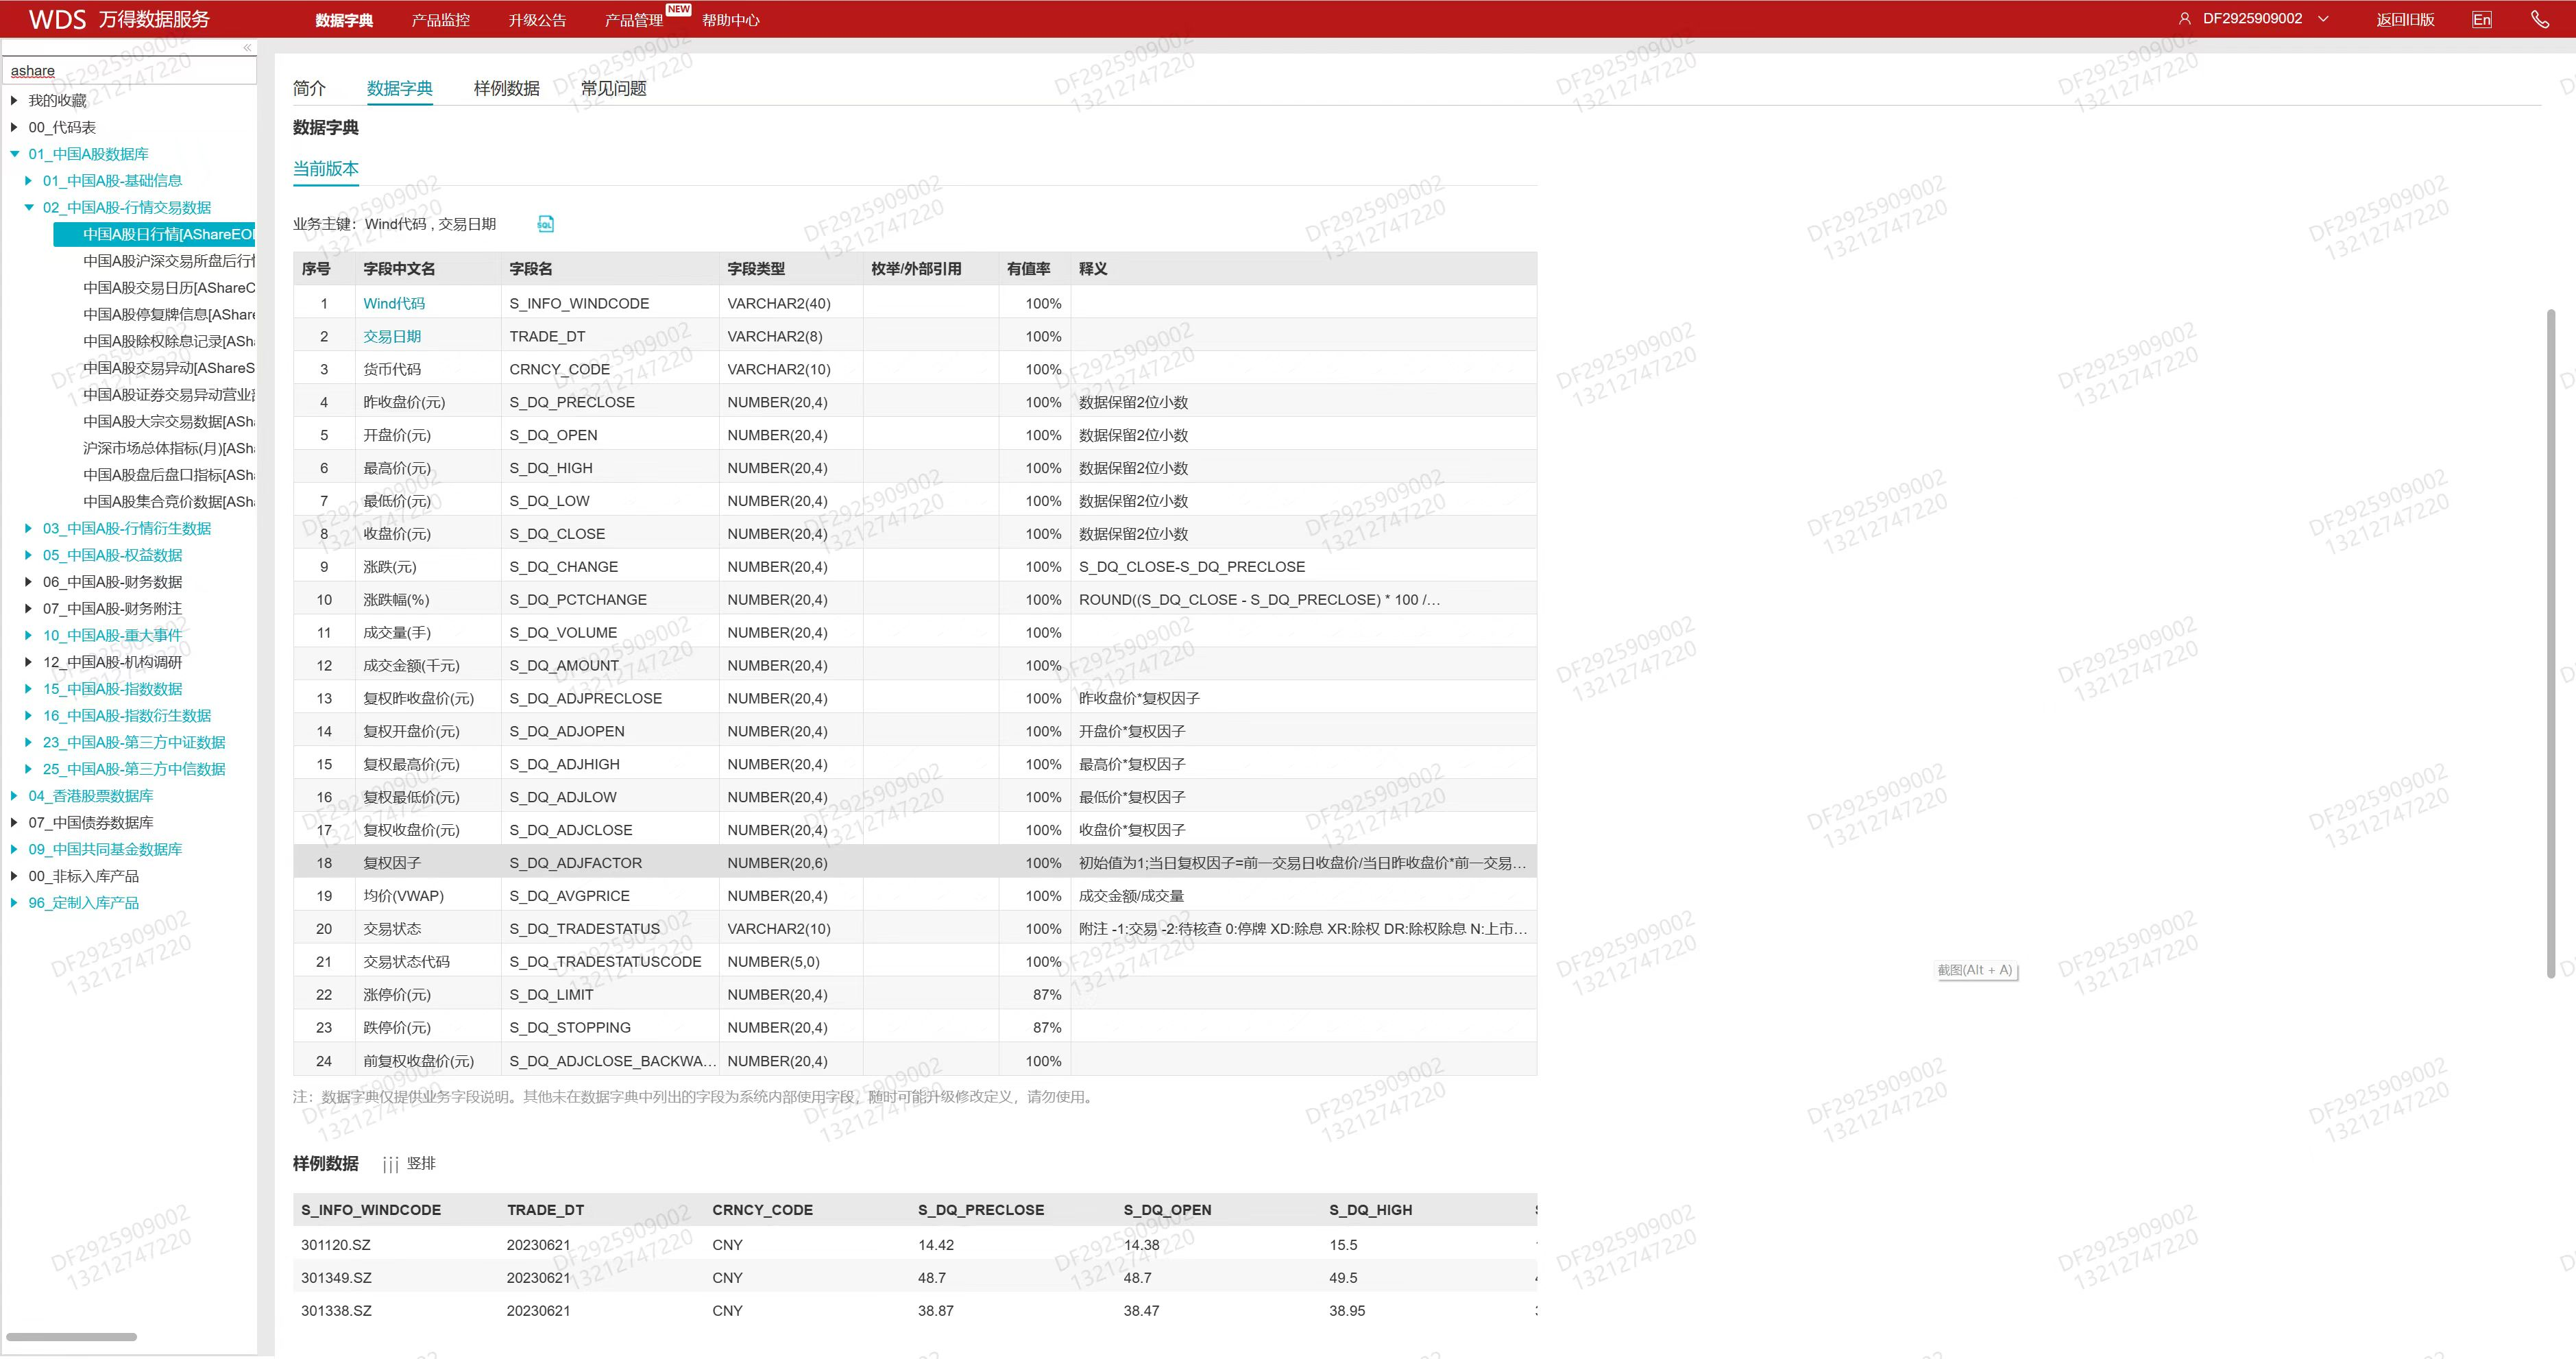

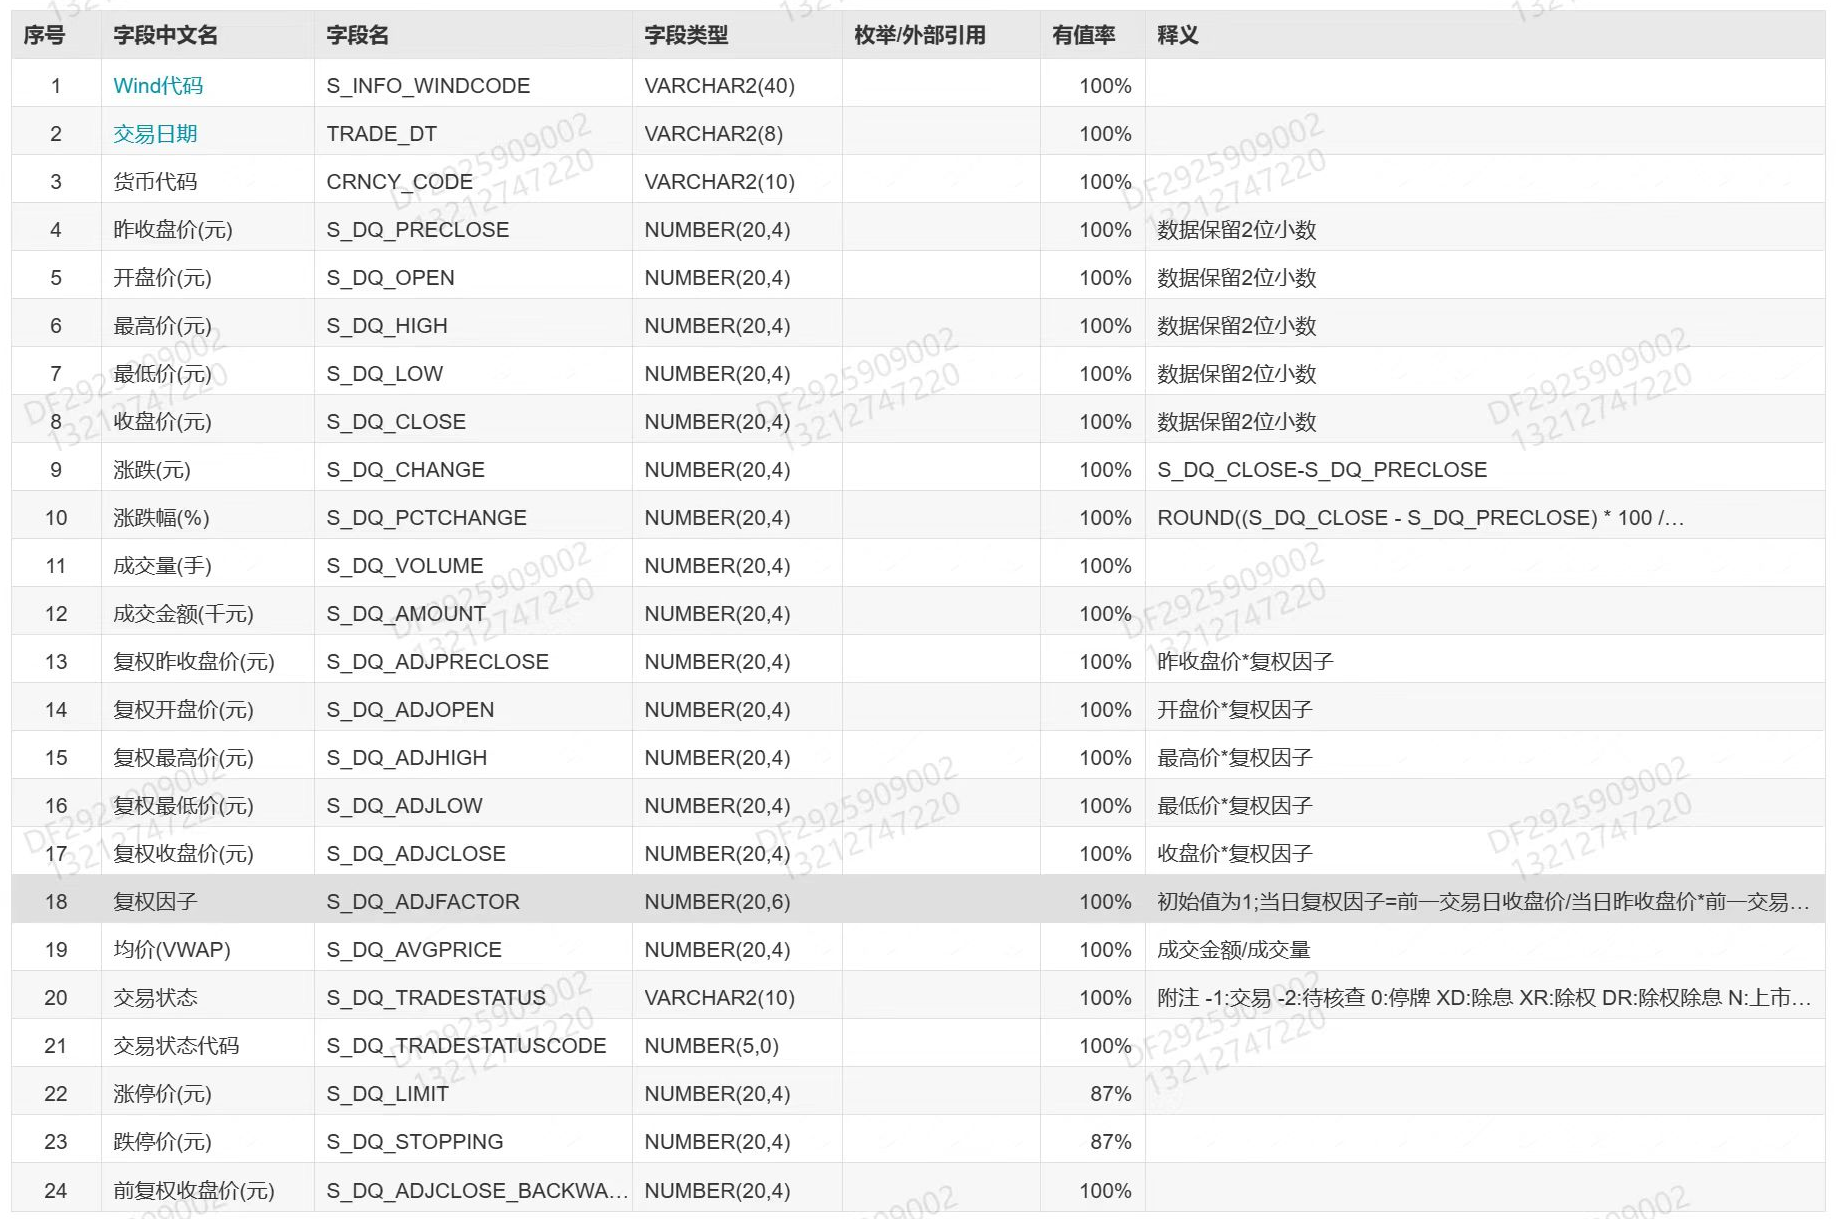

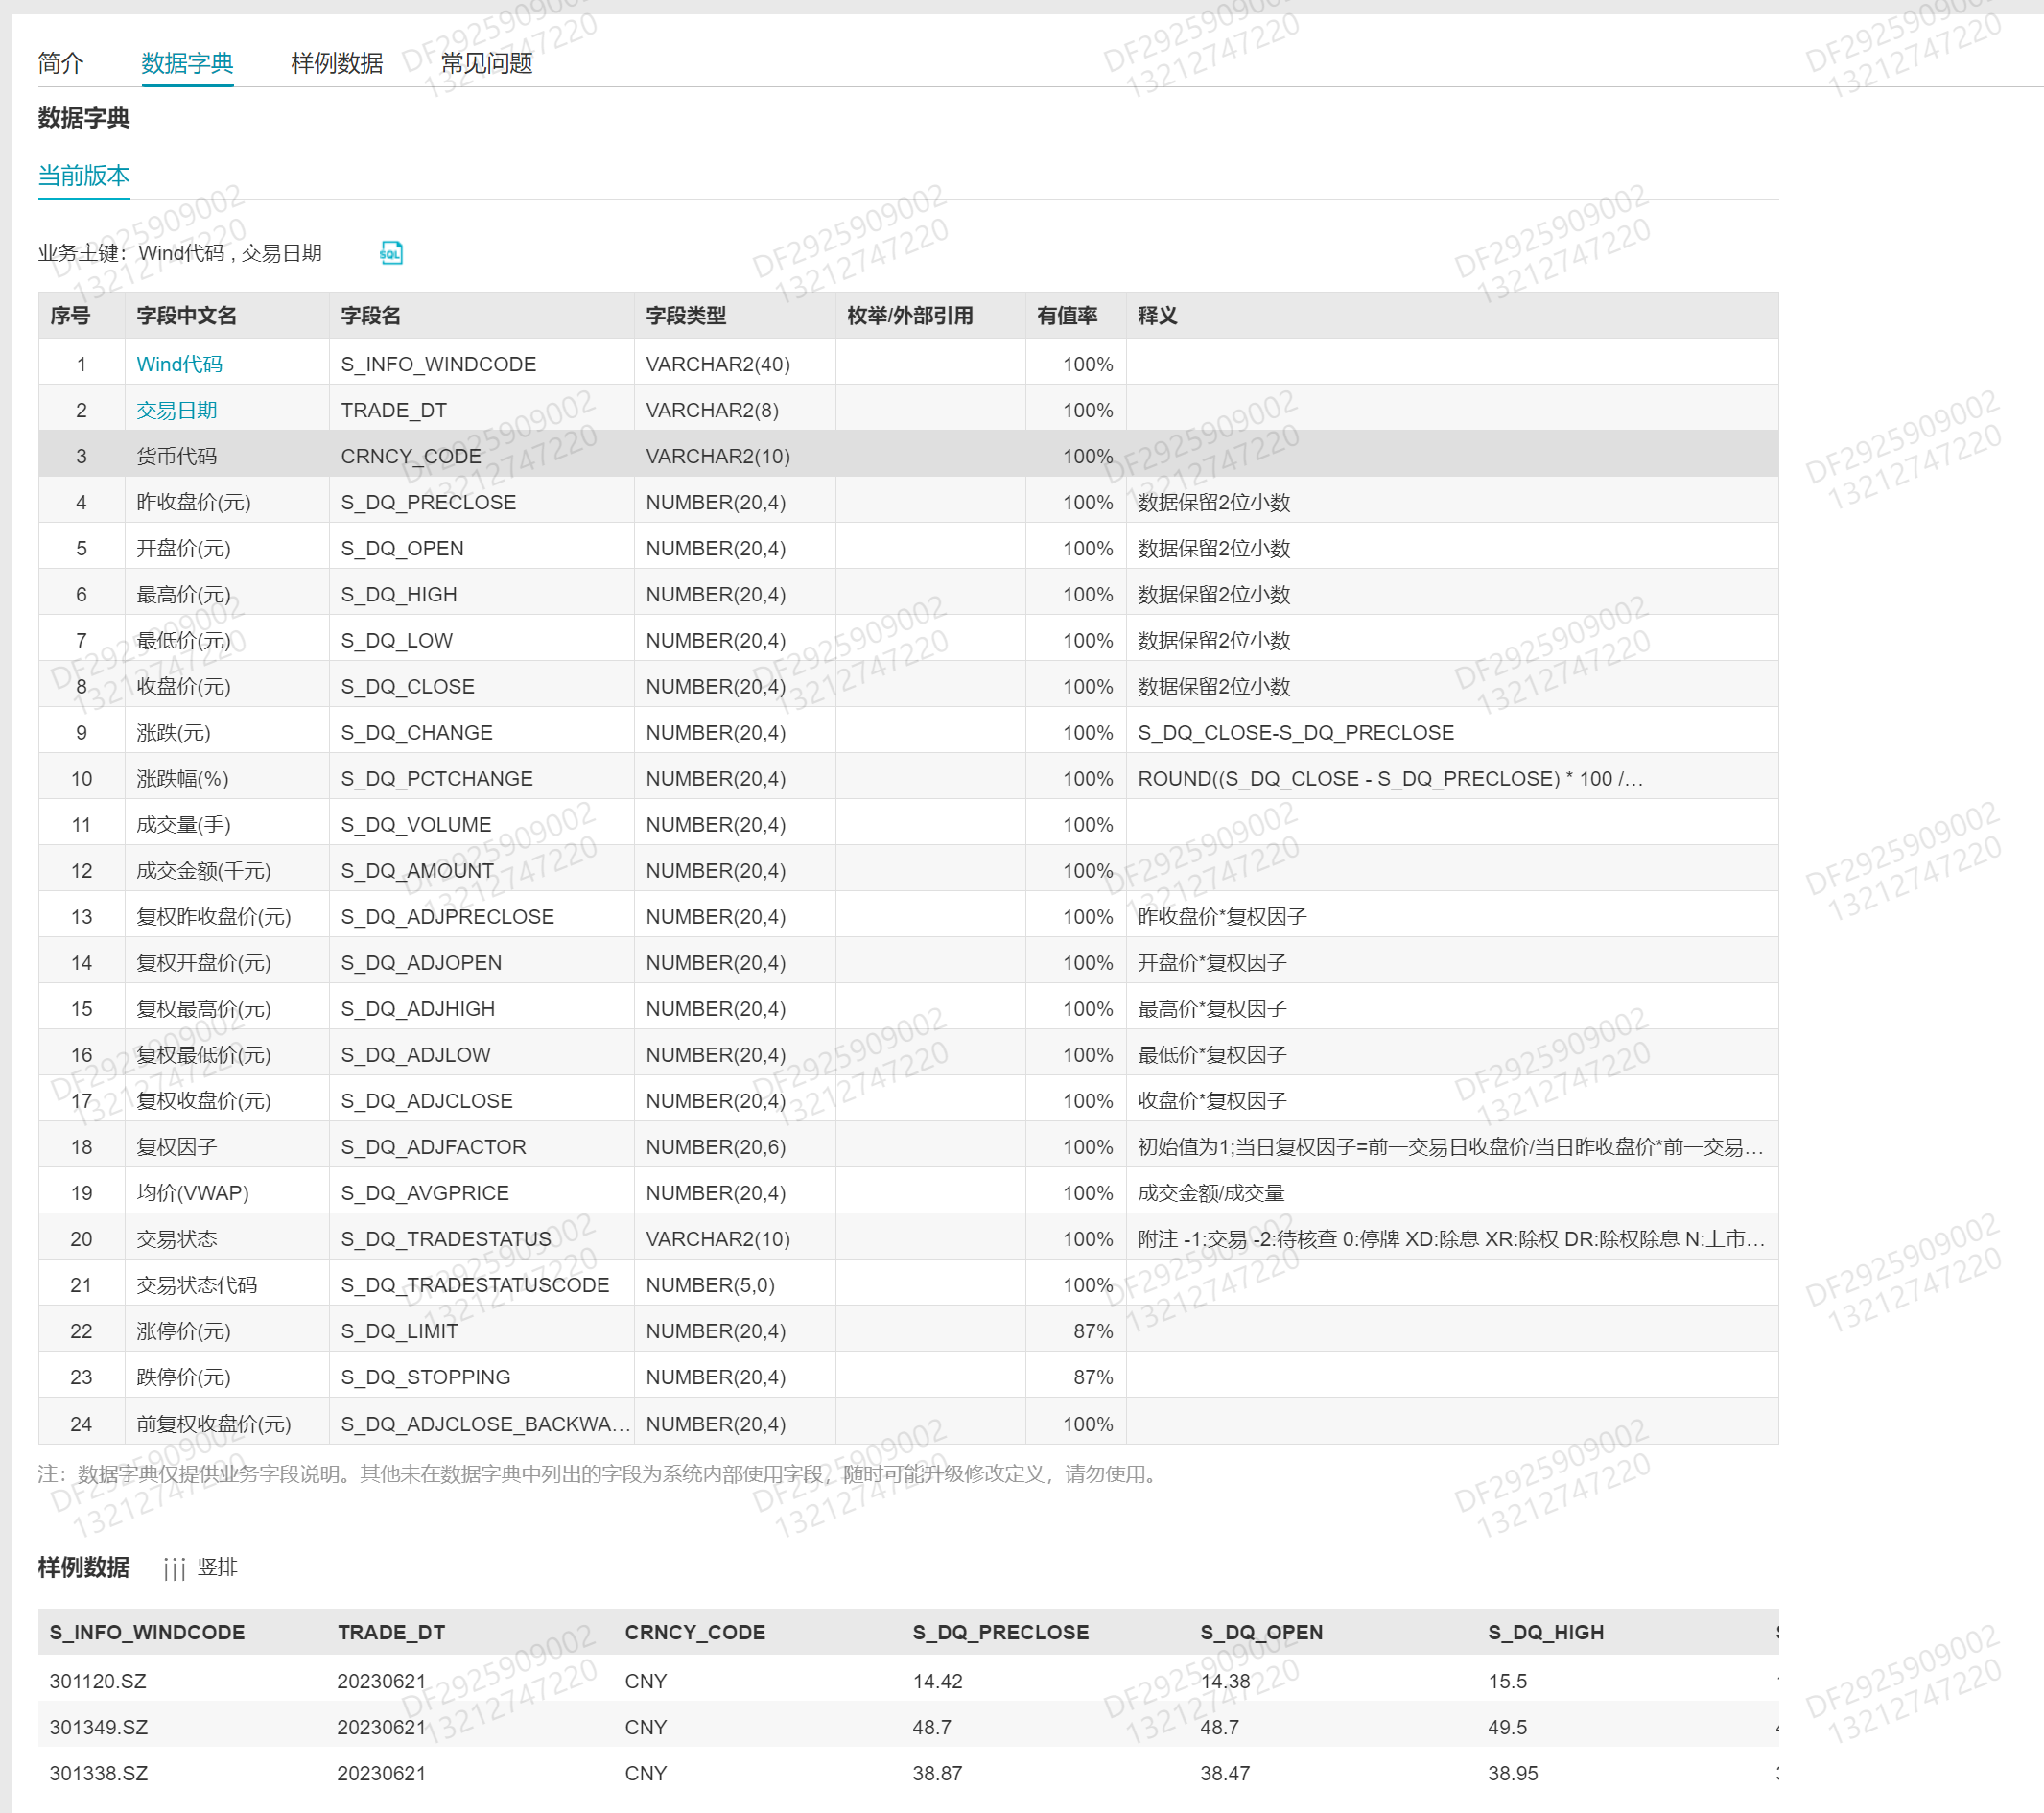

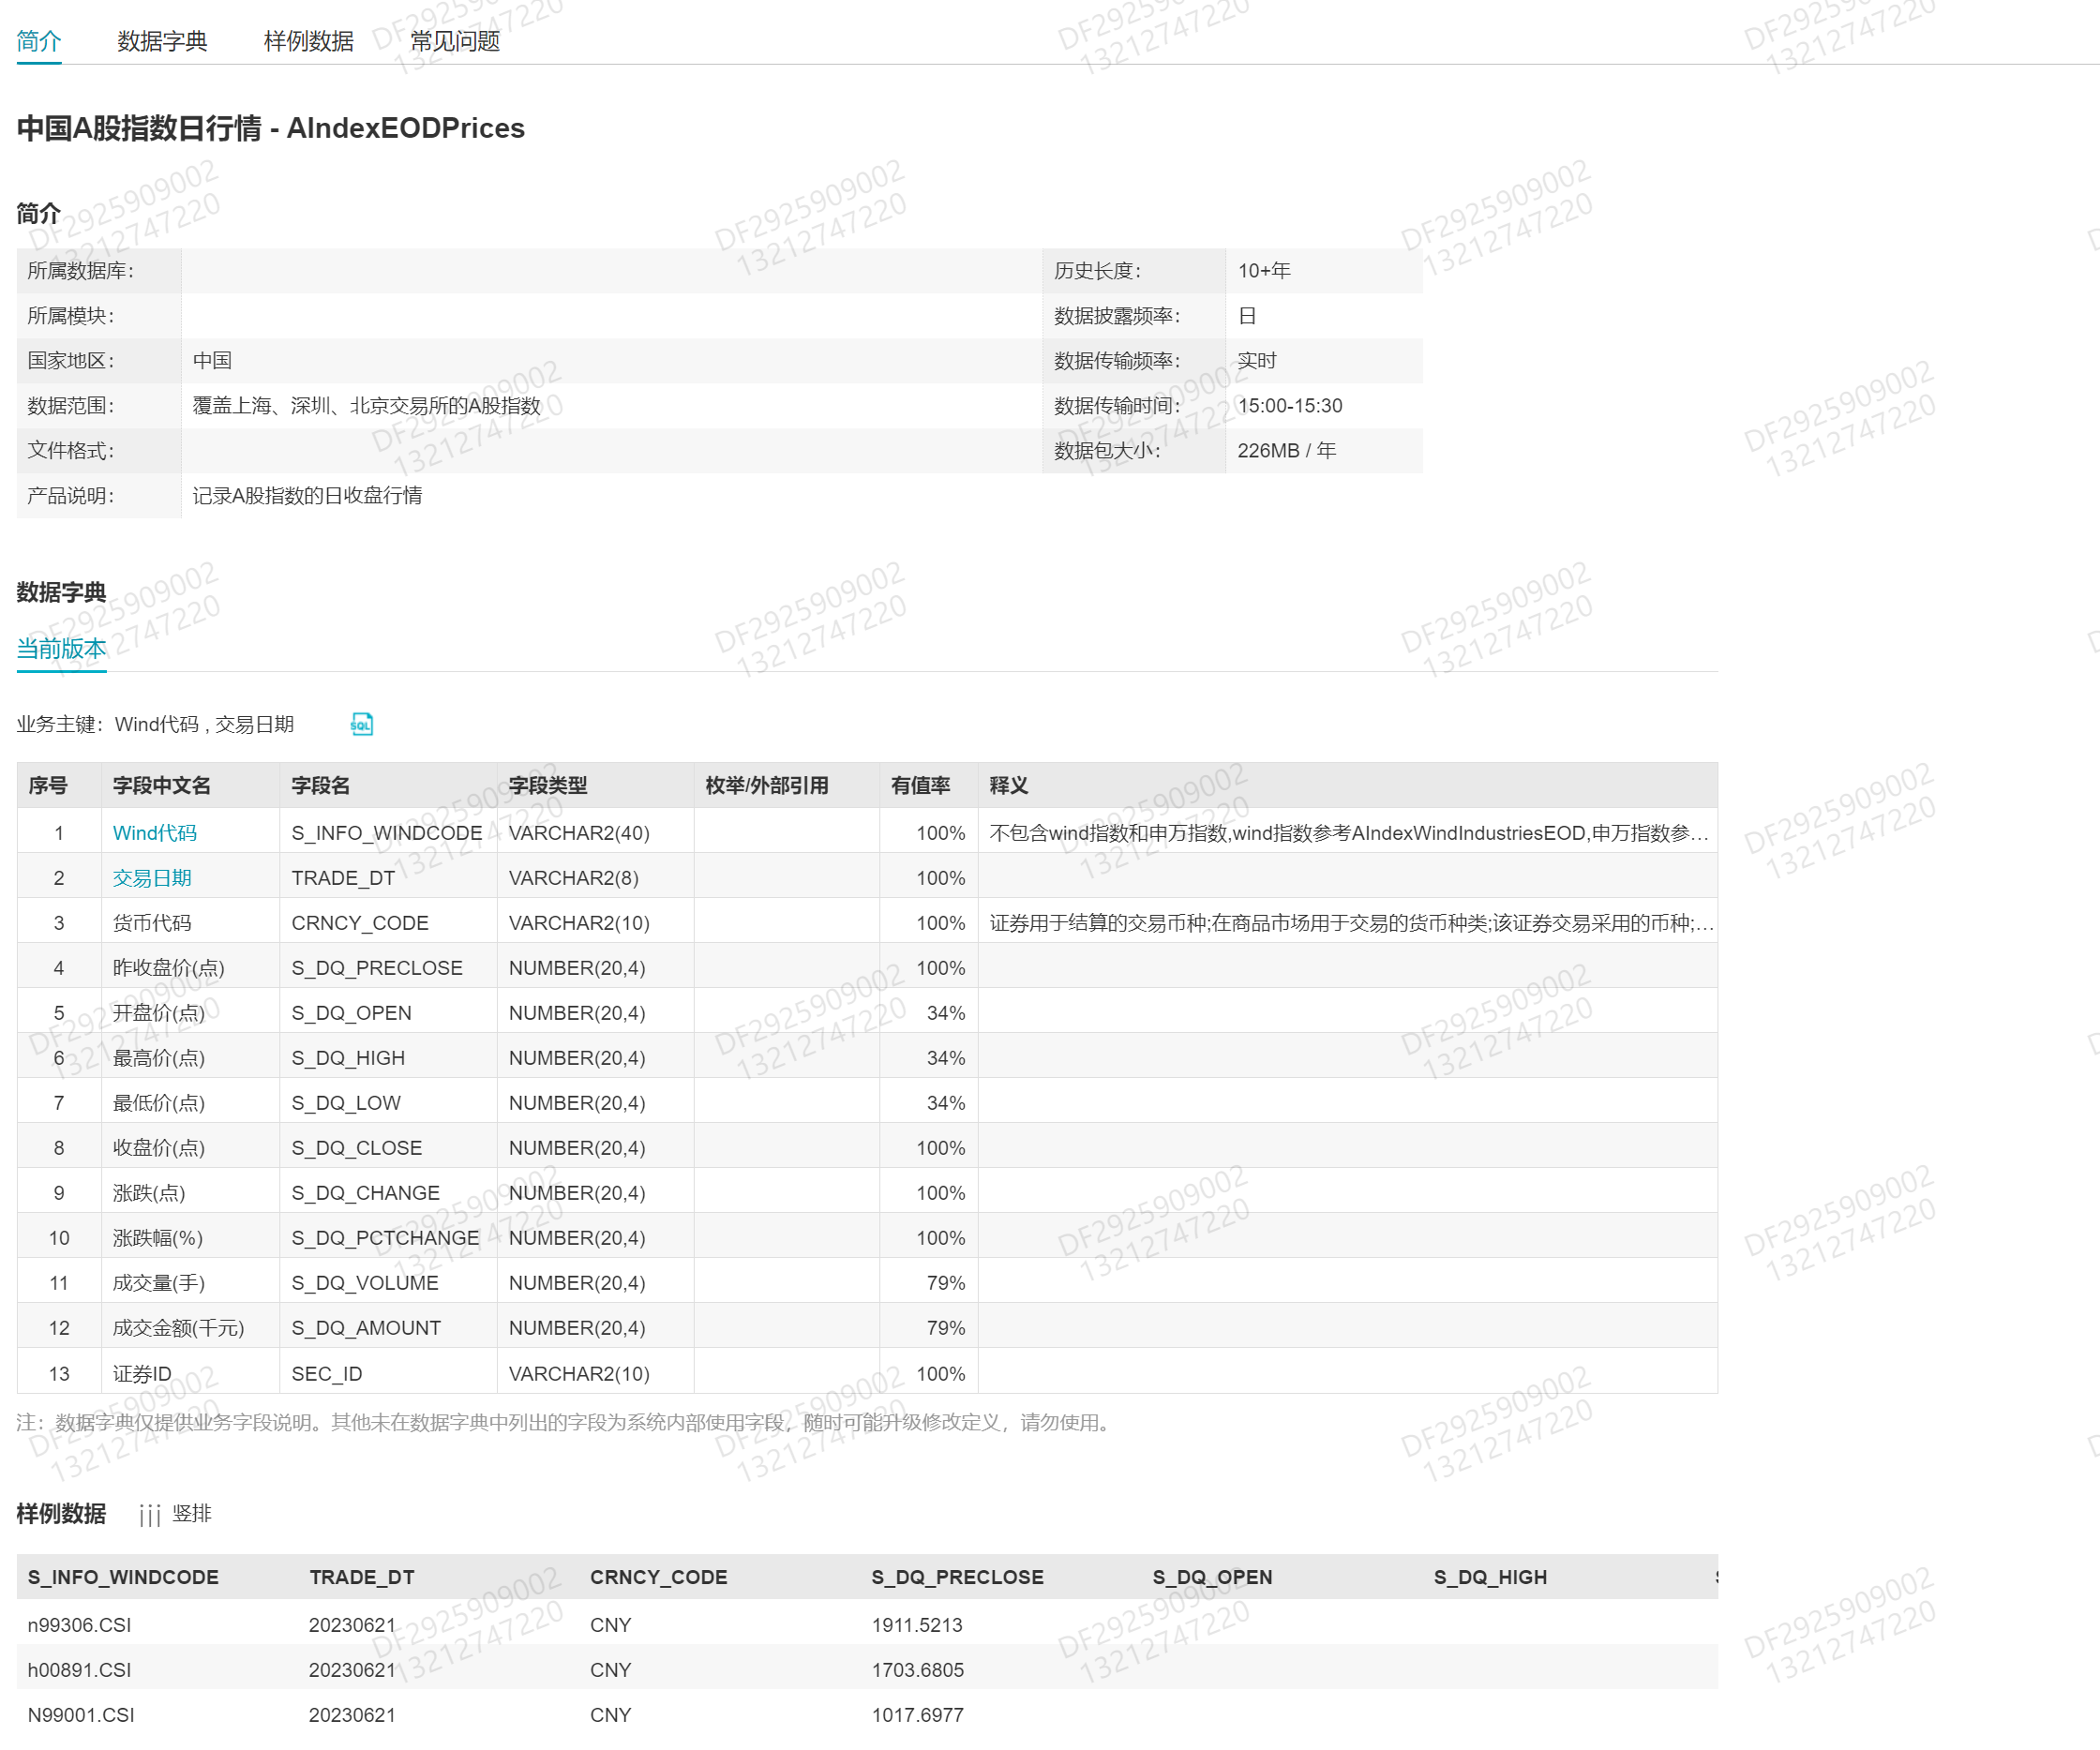

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
'''
df1 = pd.read_csv('WIND_ASHAREEODPRICES.csv')
df1 = df1.sort_values(by = 'TRADE_DT')
#print(type(df_factor))
#print(df1)
#df = df.loc['TRADE_DT']
df1 = df1[df1["TRADE_DT"] > 20140000]
'''

In [31]:
#函数封装：
#ReadData: 读取数据并进行基本的数据处理（根据交易日期升序排序且去除2014年之前的数据）
#Filename: 文件名
#df: 用于存储数据的dataframe
def ReadData(Filename):
    import numpy as np
    import pandas as pd
    import datetime as dt
    df = pd.read_csv(Filename)
    df = df.sort_values(by = 'TRADE_DT')
    #df = df[df['TRADE_DT' > 20140000]]
    return df

In [28]:
df1 = ReadData('WIND_ASHAREEODPRICES.csv')
df1 = df1[df1["TRADE_DT"] > 20140000]
df2 = ReadData('WIND_AINDEXEODPRICES.csv')
df2 = df2[df2["TRADE_DT"] > 20140000]

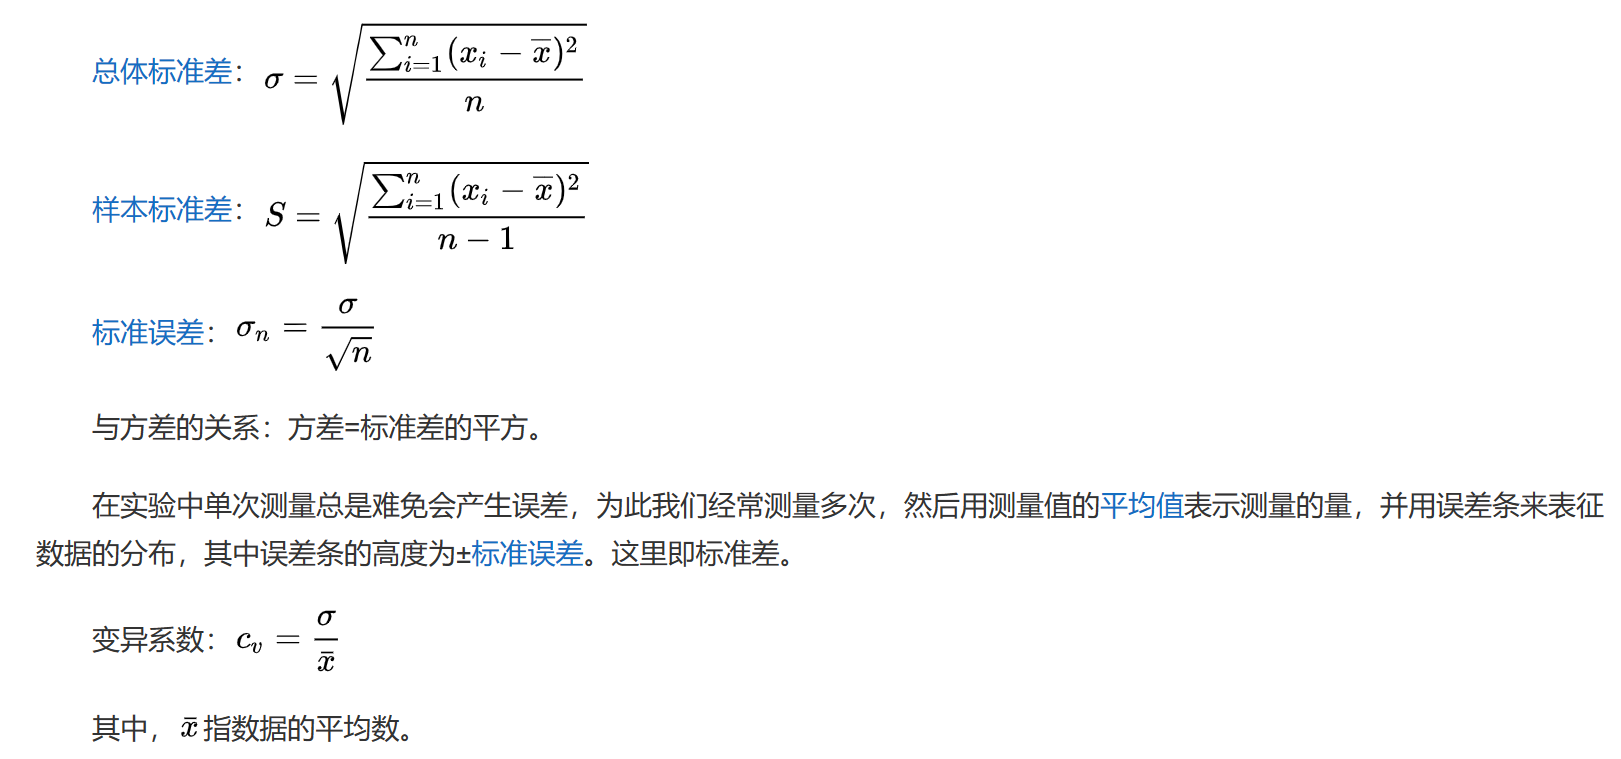

In [29]:
df1

,OBJECT_ID,S_INFO_WINDCODE,TRADE_DT,CRNCY_CODE,S_DQ_PRECLOSE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_CHANGE,...,S_DQ_ADJFACTOR,S_DQ_AVGPRICE,S_DQ_TRADESTATUS,S_DQ_TRADESTATUSCODE,S_DQ_LIMIT,S_DQ_STOPPING,S_DQ_ADJCLOSE_BACKWARD,OPDATE,OPMODE,TRADE_DT_VIRTUAL
4147,{9897E740-F6A9-4261-B083-2A7E60946DE1},000693.SZ,20140110,CNY,7.37,13.00,14.59,12.50,12.76,5.39,...,1.748935,13.5317,XR,3,10.61,4.13,12.76,2023-05-29 15:17:22,1,2014-01-10
4148,{AA2E01D3-771C-461F-BF16-DE4ED619E574},000509.SZ,20140114,CNY,14.01,4.32,4.48,3.68,3.86,-10.15,...,9.746330,4.0670,交易,-1,15.41,12.61,3.86,2014-01-14 15:07:15,0,2014-01-14
4149,{3C03AB14-366B-41FA-9BA3-2E9C6FEA12CE},603699.SH,20140117,CNY,17.66,21.19,25.42,21.19,25.34,7.68,...,1.000000,23.6037,N,1,25.43,9.89,19.70,2023-07-12 15:12:53,1,2014-01-17
4151,{7003B824-74B2-4938-B9AB-EB51E4212EFF},002706.SZ,20140121,CNY,19.10,22.92,27.79,22.92,27.79,8.69,...,1.000000,26.8435,N,1,27.50,10.70,2.29,2023-05-05 15:16:12,1,2014-01-21
4157,{105DF788-B71A-4A30-BDA5-5B42C343CC26},300359.SZ,20140121,CNY,30.31,36.37,44.31,36.37,44.31,14.00,...,1.000000,43.0052,N,1,43.65,16.97,5.33,2014-01-21 15:07:47,0,2014-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32934,{1AC3C603-31A3-4C72-A364-5A43257ED9DD},836807.BJ,20230720,CNY,5.30,5.27,5.31,5.25,5.27,-0.03,...,1.234760,5.2701,交易,-1,6.89,3.71,5.27,2023-07-20 15:12:57,0,2023-07-20
32935,{1B6F4DE7-BB31-4D4D-8B8B-AB869FA1B5E7},837663.BJ,20230720,CNY,13.55,13.67,13.67,13.10,13.13,-0.42,...,1.433646,13.2825,交易,-1,17.61,9.49,13.13,2023-07-20 15:12:57,0,2023-07-20
35506,{BDE39089-1953-4600-8DAB-31FAD11DD46A},834770.BJ,20230720,CNY,5.46,5.43,5.47,5.43,5.45,-0.01,...,1.258328,5.4459,交易,-1,7.09,3.83,5.45,2023-07-20 15:12:57,0,2023-07-20
32728,{04E8B3F1-08F9-4179-8A3A-E4082DECFCC5},833751.BJ,20230720,CNY,8.35,8.20,8.33,7.50,7.54,-0.81,...,13.288027,7.8673,交易,-1,10.85,5.85,7.54,2023-07-20 15:12:57,0,2023-07-20


In [30]:
df2

,OBJECT_ID,S_INFO_WINDCODE,TRADE_DT,CRNCY_CODE,S_DQ_PRECLOSE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_CHANGE,S_DQ_PCTCHANGE,S_DQ_VOLUME,S_DQ_AMOUNT,SEC_ID,OPDATE,OPMODE
2184,{354D9067-B412-5FDF-E053-1001C80A192F},000985.CSI,20140102,CNY,2893.2080,2887.0090,2900.9080,2878.8630,2900.6260,7.4180,0.2564,1.422798e+08,1.565203e+08,S6305858,2016-06-15 16:07:03,0
2185,{354D9067-B413-5FDF-E053-1001C80A192F},000985.CSI,20140103,CNY,2900.6260,2891.7130,2895.0930,2862.2230,2874.3220,-26.3040,-0.9068,1.704732e+08,1.813516e+08,S6305858,2016-06-15 16:07:03,0
2186,{354D9067-B414-5FDF-E053-1001C80A192F},000985.CSI,20140106,CNY,2874.3220,2868.3590,2868.3590,2798.0260,2803.2880,-71.0340,-2.4713,1.771107e+08,1.769855e+08,S6305858,2016-06-15 16:07:03,0
2183,{354D9067-B415-5FDF-E053-1001C80A192F},000985.CSI,20140107,CNY,2803.2880,2787.4200,2818.9280,2781.7150,2814.1030,10.8150,0.3858,1.319374e+08,1.383971e+08,S6305858,2016-06-15 16:07:03,0
2187,{354D9067-B416-5FDF-E053-1001C80A192F},000985.CSI,20140108,CNY,2814.1030,2817.6570,2846.5820,2809.6170,2825.8250,11.7220,0.4165,1.554085e+08,1.726149e+08,S6305858,2016-06-15 16:07:03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,{AD3B9118-184A-42FB-AC56-DFA78E70B93A},000985.CSI,20230719,CNY,4851.5701,4846.2330,4862.4423,4819.3849,4844.2940,-7.2761,-0.1500,5.141199e+08,6.594095e+08,S6305858,2023-07-19 17:22:04,1
4507,{4DDFF5C9-1A07-4E6C-A4DB-45E3B809F323},000985.CSI,20230720,CNY,4844.2940,4850.3310,4863.2401,4791.6740,4796.9051,-47.3889,-0.9782,5.928497e+08,7.410104e+08,S6305858,2023-07-20 17:37:50,1
4508,{1E7F8ADF-3BBB-4A86-86CB-729B0D39775B},000985.CSI,20230721,CNY,4796.9051,4788.2446,4823.0638,4776.9070,4791.5230,-5.3821,-0.1122,5.639472e+08,6.682991e+08,S6305858,2023-07-21 17:43:05,1
4509,{64168B72-5ACA-44C7-B26F-86B5A3C9B016},000985.CSI,20230724,CNY,4791.5230,4777.1294,4809.6332,4764.9867,4779.8231,-11.6999,-0.2442,5.388383e+08,6.235116e+08,S6305858,2023-07-24 18:23:24,1


In [32]:
'''
import pandas as pd
import os

# 读取股票数据
stock_data = pd.read_csv(r"C:\Users\HanweN\Desktop\WIND_ASHAREEODPRICES.csv")

# 将日期列转换为日期时间类型
stock_data["TRADE_DT_VIRTUAL"] = pd.to_datetime(stock_data["TRADE_DT_VIRTUAL"])

# 根据股票代码和日期对数据进行排序
stock_data.sort_values(by=["S_INFO_WINDCODE", "TRADE_DT_VIRTUAL"], inplace=True)

# 计算每支股票每日最高价和最低价的比例 t
stock_data["t"] = stock_data["S_DQ_HIGH"] / stock_data["S_DQ_LOW"]

# 计算 t 的标准差，窗口大小为3个月的交易日数量
window_size = 3 * 21  # 三个月的交易日数量
stock_data["Std_t"] = stock_data.groupby("S_INFO_WINDCODE")["t"].rolling(window=window_size, min_periods=1).std().reset_index(0, drop=True)

# 按 t 的标准差进行分层
stock_data["Layer"] = pd.qcut(stock_data["Std_t"], 5, labels=False)

# 获取每支股票每日的收益率
stock_data["Return"] = (stock_data["S_DQ_CLOSE"] - stock_data["S_DQ_OPEN"]) / stock_data["S_DQ_OPEN"]

# 将每支股票的收益率向上移动一行，代表第二天的收益率
stock_data["Next_Day_Return"] = stock_data.groupby("S_INFO_WINDCODE")["Return"].shift(-1)

# 使用pivot_table计算每层每日的平均收益率
layer_returns = stock_data.pivot_table(index="TRADE_DT_VIRTUAL", columns="Layer", values="Next_Day_Return", aggfunc="mean")

# 获取桌面路径
desktop_path = os.path.join(os.path.join(os.environ["USERPROFILE"]), "Desktop")

# 将分层股票数据保存到桌面
stock_data_csv_path = os.path.join(desktop_path, "stock_data.csv")
stock_data.to_csv(stock_data_csv_path, index=False)

print(f"股票数据已成功保存到 {stock_data_csv_path}")
'''

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HanweN\\Desktop\\WIND_ASHAREEODPRICES.csv'

In [42]:
#here sd stands for the standard deviation of the quotient of the maximum dividing the minimum during the nearby three months.
def StandardDeviationProcess(df, window_size):
    df["t"] = df["S_DQ_HIGH"] / df["S_DQ_LOW"]
    df["SD"] = df.groupby("S_INFO_WINDCODE")["t"].rolling(window=window_size, min_periods=1).std().reset_index(0, drop=True)
    df["Layer"] = pd.qcut(df["SD"], 5, labels=False)
    df["Return"] = (df["S_DQ_CLOSE"] - df["S_DQ_OPEN"]) / df["S_DQ_OPEN"]
    df["Next_Day_Return"] = df.groupby("S_INFO_WINDCODE")["Return"].shift(-1)
    layer_returns = df.pivot_table(index="TRADE_DT_VIRTUAL", columns="Layer", values="Next_Day_Return", aggfunc="mean")
    desktop_path = os.path.join(os.path.join(os.environ["USERPROFILE"]), "Desktop")
    df_csv_path = os.path.join(desktop_path, "stock_data.csv")
    df.to_csv(df_csv_path, index=False)
    return df

window_size1 = 3 * 21
df1 = StandardDeviationProcess(df1, window_size1)
df1

,OBJECT_ID,S_INFO_WINDCODE,TRADE_DT,CRNCY_CODE,S_DQ_PRECLOSE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_CHANGE,...,S_DQ_STOPPING,S_DQ_ADJCLOSE_BACKWARD,OPDATE,OPMODE,TRADE_DT_VIRTUAL,t,SD,Layer,Return,Next_Day_Return
4147,{9897E740-F6A9-4261-B083-2A7E60946DE1},000693.SZ,20140110,CNY,7.37,13.00,14.59,12.50,12.76,5.39,...,4.13,12.76,2023-05-29 15:17:22,1,2014-01-10,1.167200,NaN,NaN,-0.018462,0.000000
4148,{AA2E01D3-771C-461F-BF16-DE4ED619E574},000509.SZ,20140114,CNY,14.01,4.32,4.48,3.68,3.86,-10.15,...,12.61,3.86,2014-01-14 15:07:15,0,2014-01-14,1.217391,NaN,NaN,-0.106481,-0.003690
4149,{3C03AB14-366B-41FA-9BA3-2E9C6FEA12CE},603699.SH,20140117,CNY,17.66,21.19,25.42,21.19,25.34,7.68,...,9.89,19.70,2023-07-12 15:12:53,1,2014-01-17,1.199622,NaN,NaN,0.195847,0.012552
4151,{7003B824-74B2-4938-B9AB-EB51E4212EFF},002706.SZ,20140121,CNY,19.10,22.92,27.79,22.92,27.79,8.69,...,10.70,2.29,2023-05-05 15:16:12,1,2014-01-21,1.212478,NaN,NaN,0.212478,-0.006525
4157,{105DF788-B71A-4A30-BDA5-5B42C343CC26},300359.SZ,20140121,CNY,30.31,36.37,44.31,36.37,44.31,14.00,...,16.97,5.33,2014-01-21 15:07:47,0,2014-01-21,1.218312,NaN,NaN,0.218312,0.011945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32934,{1AC3C603-31A3-4C72-A364-5A43257ED9DD},836807.BJ,20230720,CNY,5.30,5.27,5.31,5.25,5.27,-0.03,...,3.71,5.27,2023-07-20 15:12:57,0,2023-07-20,1.011429,0.029406,4.0,0.000000,NaN
32935,{1B6F4DE7-BB31-4D4D-8B8B-AB869FA1B5E7},837663.BJ,20230720,CNY,13.55,13.67,13.67,13.10,13.13,-0.42,...,9.49,13.13,2023-07-20 15:12:57,0,2023-07-20,1.043511,0.040281,4.0,-0.039503,NaN
35506,{BDE39089-1953-4600-8DAB-31FAD11DD46A},834770.BJ,20230720,CNY,5.46,5.43,5.47,5.43,5.45,-0.01,...,3.83,5.45,2023-07-20 15:12:57,0,2023-07-20,1.007366,0.010329,0.0,0.003683,NaN
32728,{04E8B3F1-08F9-4179-8A3A-E4082DECFCC5},833751.BJ,20230720,CNY,8.35,8.20,8.33,7.50,7.54,-0.81,...,5.85,7.54,2023-07-20 15:12:57,0,2023-07-20,1.110667,0.113505,4.0,-0.080488,NaN
